# GRIP:The spark foundation
# Data Science and business analytics-Internship
# Creator-Manajit Mahapatra
# Task 1:Prediction using decision tree algorithm
# For the given dataset we have to bild the decision tree

    

#importing important libraries
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#reading the dataset
data=pd.DataFrame(pd.read_csv('C:\\Users\\mahap\\Downloads\\Iris.csv'))

In [3]:
#droping the column name id as its not required
data=data.drop(['Id'],axis=1)

In [4]:
label_encoder = preprocessing.LabelEncoder()

In [5]:
#using label encoder to make lables for target variable species
data['Species']= label_encoder.fit_transform(data['Species'])
data['Species'].unique()

array([0, 1, 2])

In [6]:
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [7]:
#checking is there any null values or not
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.shape

(150, 5)

In [9]:
sns.set_style('darkgrid')

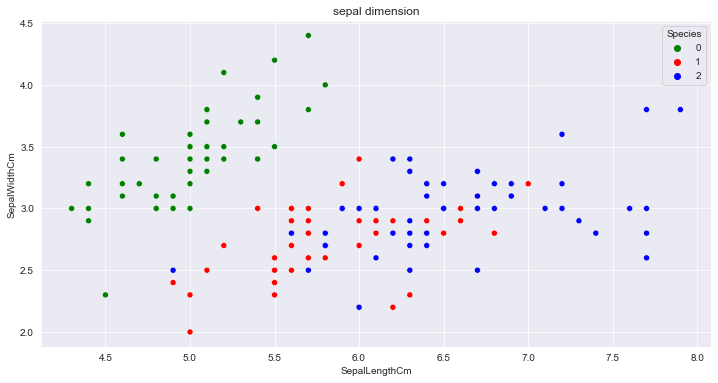

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data['SepalLengthCm'],y=data['SepalWidthCm'],hue=data['Species'],palette=['green','red','blue'])
plt.title('sepal dimension')
plt.show()

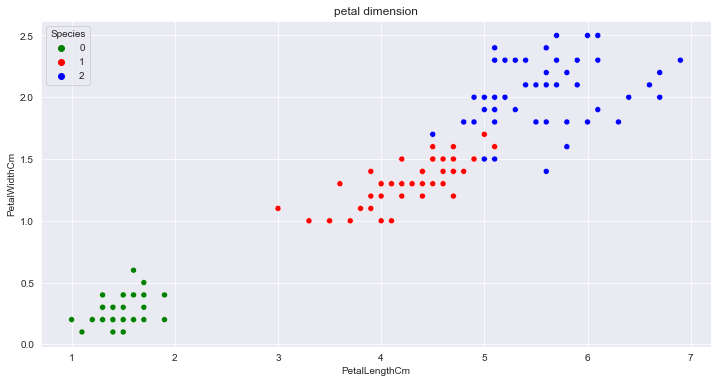

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data['PetalLengthCm'],y=data['PetalWidthCm'],hue=data['Species'],palette=['green','red','blue'])
plt.title('petal dimension')
plt.show()

In [12]:
#taking the independent variable and target variable
Y=data['Species']
X=data.drop(['Species'],axis=1)

In [13]:
#using test train split to split the data into training data and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=525)

In [14]:
clf=DecisionTreeClassifier()

In [15]:
#training the data
clf=clf.fit(X_train,Y_train)

In [16]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [17]:
#predicting the data 
predictions=clf.predict(X_test)
predictions

array([2, 1, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1,
       1, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 1, 0, 2, 2, 1, 2, 1, 1, 1, 0, 1,
       0])

In [18]:
#accuracy of the model
accuracy_score(Y_test,predictions)

0.9111111111111111

In [19]:
#using confusion matrix to check how many samples are predicted wrong
cf=confusion_matrix(Y_test,predictions,labels=[0,1,2])
cf

array([[11,  0,  0],
       [ 0, 17,  3],
       [ 0,  1, 13]], dtype=int64)

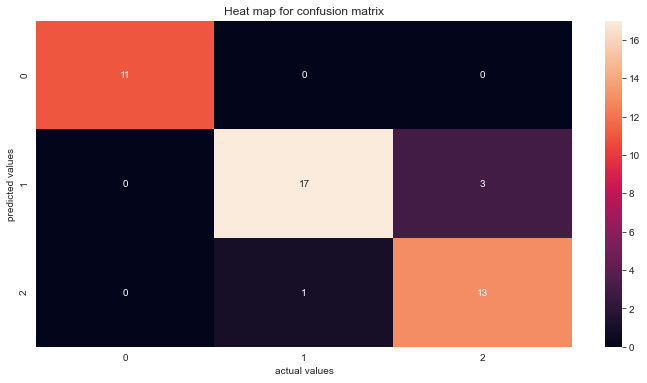

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(cf, annot=True)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Heat map for confusion matrix')
plt.show()

In [21]:
predictions=clf.predict(X_train)
predictions

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 1,
       0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2,
       2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 0, 0, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0])

In [22]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]

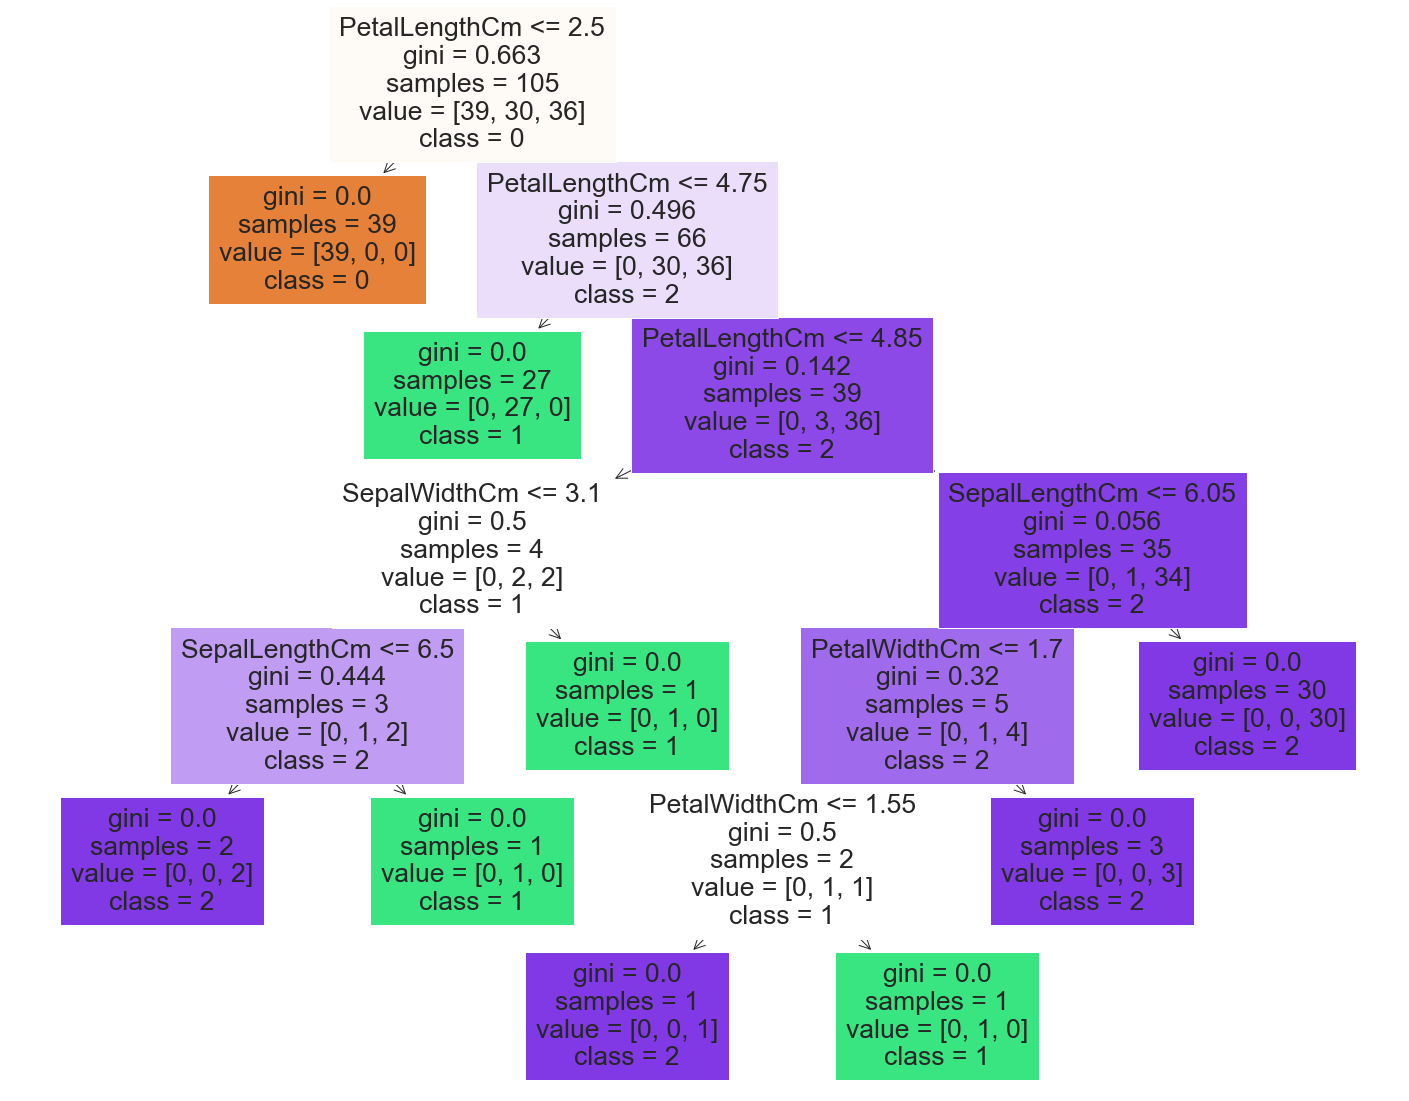

In [23]:
#plotting the tree
fig = plt.figure(figsize=(25,20))
graph= tree.plot_tree(clf, 
                   feature_names=dt_feature_names,  
                   class_names=dt_target_names,
                   filled=True)



In [24]:
#texual represention of decision tree
text_representation=tree.export_text(clf)

print(text_representation)

|--- feature_2 <= 2.50
|   |--- class: 0
|--- feature_2 >  2.50
|   |--- feature_2 <= 4.75
|   |   |--- class: 1
|   |--- feature_2 >  4.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- feature_0 <= 6.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_0 >  6.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- feature_3 <= 1.70
|   |   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  1.70
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2



from the above tree you  can see that if petal length less than equal to 2.50 cm then it will be in class 0 it is the root node.IF its greater than 2.50 there are two possibilities , it form a decision node to make a decision for a leaf node.We keep doing this until we find a pure leaf node. Leaf nodes cannot be further divided. And thus a decision tree forms. 

We can control the depth of the decision tree.  